## Extended Reddit Comments Analysis for "Noon"
## In this notebook, we extend our analysis of Reddit comments mentioning "noon" by:
    1. Computing a relevance score based on the number of times "noon" is mentioned and the comment's engagement.
    2. Sentiment Analysis: Using VADER to quantify the sentiment of each comment.
    3. Temporal Analysis: Analyzing the daily average sentiment.
    4. Word Cloud Visualization: Generating a word cloud to capture frequently used words.
    5. Topic Modeling (Optional): Applying LDA to identify latent topics in the comments.
This multi-faceted approach helps not only in ranking the comments but also in understanding public sentiment and thematic trends.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   post_id                3598 non-null   object
 1   post_title             3598 non-null   object
 2   comment_id             3598 non-null   object
 3   author                 3360 non-null   object
 4   comment_text           3598 non-null   object
 5   score                  3598 non-null   int64 
 6   created_utc            3598 non-null   object
 7   is_submitter           3598 non-null   bool  
 8   contains_noon_mention  3598 non-null   bool  
 9   type                   3598 non-null   object
 10  subreddit              3079 non-null   object
dtypes: bool(2), int64(1), object(8)
memory usage: 260.1+ KB
None

First few rows:
   post_id                                     post_title comment_id  \
0  1ibzgq5  Dubai to Riyadh - Which Road to Take? 1 or 2?  

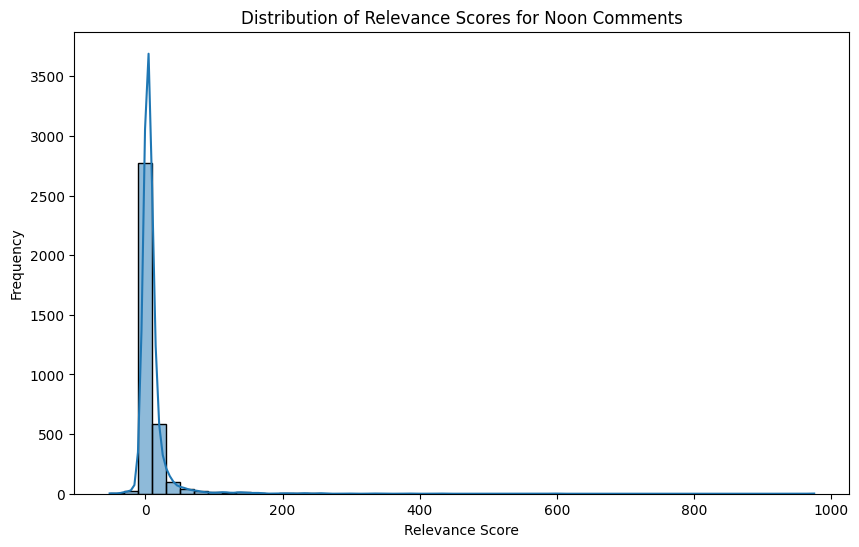

/var/folders/gx/9cn8k5x52gq_wpn2s2w4j2340000gn/T/ipykernel_31314/1935768838.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subreddit_counts.values, y=subreddit_counts.index, palette="viridis")


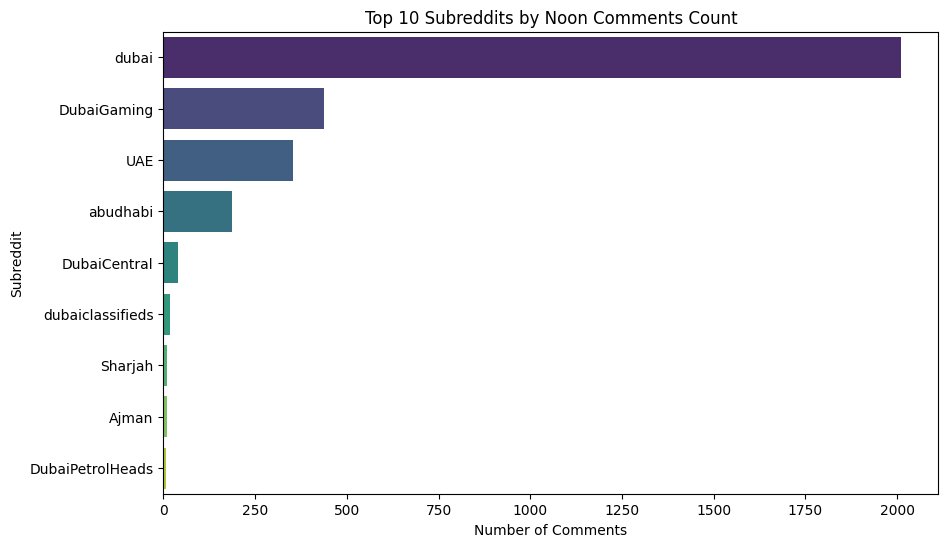

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset of filtered "noon" comments (update the file name as needed)
file_name = "../Data/processed/Final_Noon_Datasets.csv"  # Change to your file's name if needed
df = pd.read_csv(file_name)

# Display basic dataset information
print("DataFrame Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Define a function to count the occurrences of the word "noon" (case-insensitive)
def count_keyword(text, keyword='noon'):
    if pd.isna(text):
        return 0
    return len(re.findall(r'\b' + re.escape(keyword) + r'\b', text.lower()))

# Compute the frequency of "noon" in each comment
df['noon_count'] = df['comment_text'].apply(lambda x: count_keyword(x, 'noon'))

# Calculate the relevance score: multiplying the comment score by (1 + number of "noon" mentions)
df['relevance_score'] = df['score'] * (1 + df['noon_count'])

# Display summary statistics for the relevance score
print("\nRelevance Score Statistics:")
print(df['relevance_score'].describe())

# Sort and show the top 5 most relevant comments
df_sorted = df.sort_values(by='relevance_score', ascending=False)
print("\nTop 5 Most Relevant Comments:")
print(df_sorted[['comment_text', 'score', 'noon_count', 'relevance_score']].head())





## Additional Analysis: Sentiment, Time Series, Word Cloud & Topic Modeling
## Next, we extend our analysis with: 
    1. Sentiment Analysis: Using VADER to compute a sentiment score for each comment.
    2. Time Series Analysis: Observing how average daily sentiment evolves.
    3. Word Cloud: Visualizing frequently occurring words.
    4. Topic Modeling (Optional): Uncovering latent topics with LDA.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hariharakumarrathinar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Sentiment Statistics:
count    3598.000000
mean        0.145330
std         0.501787
min        -0.989000
25%        -0.202300
50%         0.090000
75%         0.571300
max         0.996600
Name: sentiment, dtype: float64


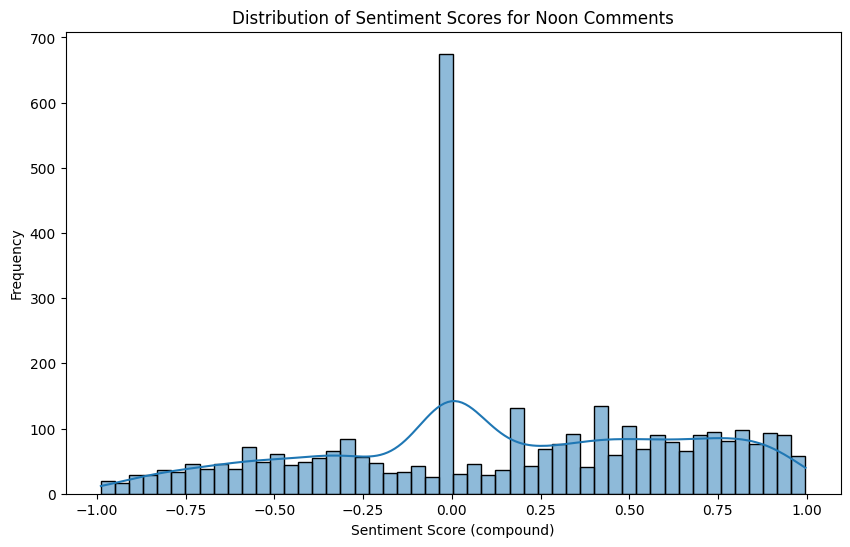

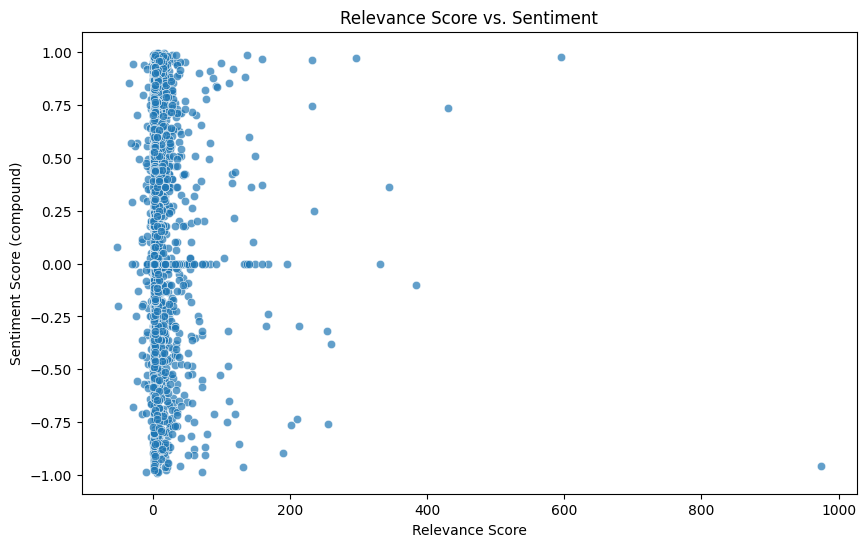

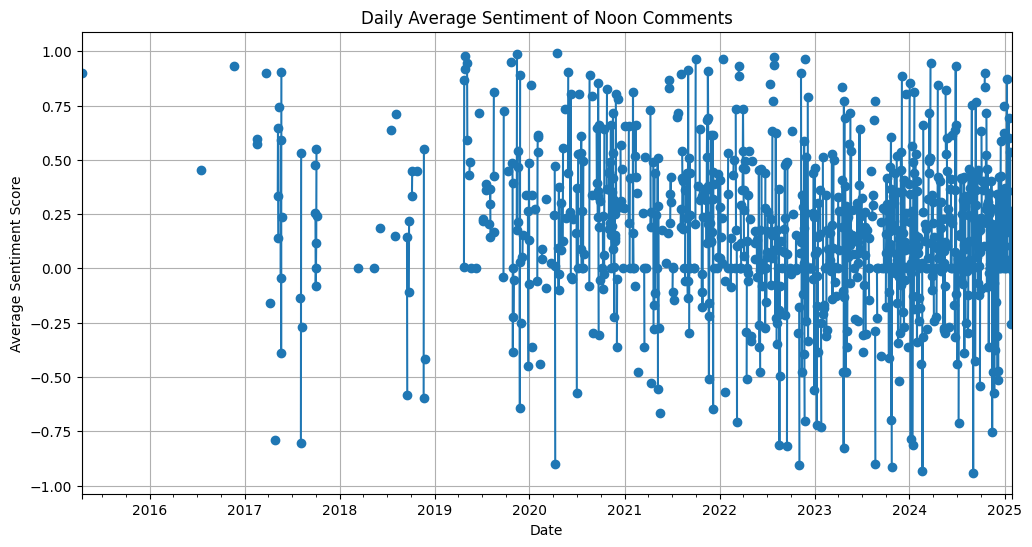

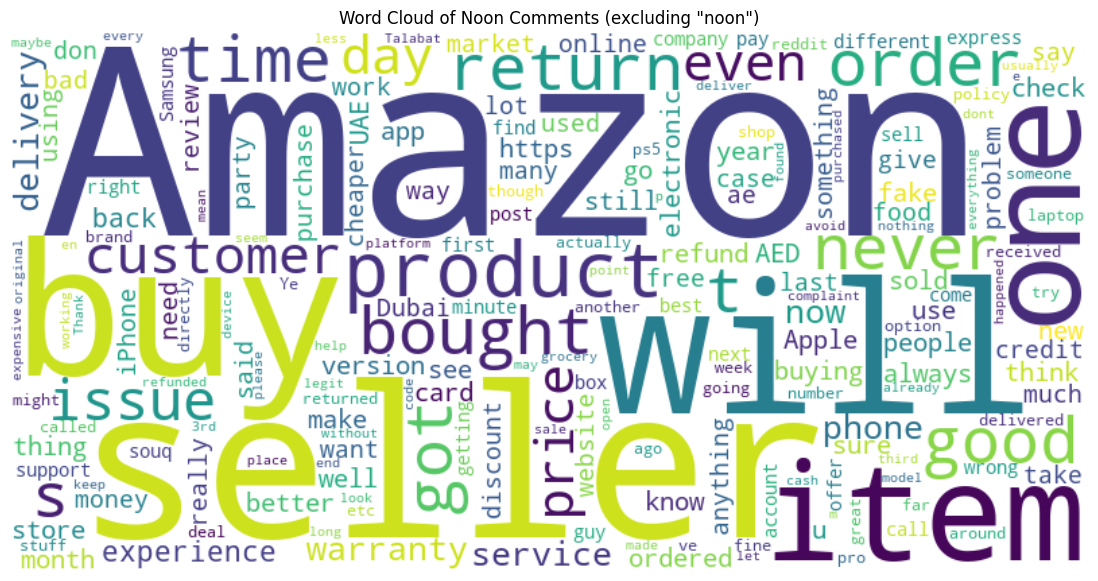


Identified Topics:
Topic 1: card, like, aed, account, credit, cashback, use, app, pay, think
Topic 2: com, amazon, warranty, https, seller, version, bought, uae, got, www
Topic 3: amazon, order, time, delivery, like, just, food, app, minutes, good
Topic 4: amazon, buy, just, don, seller, buying, people, sellers, better, customer
Topic 5: bought, item, got, return, refund, seller, phone, just, amazon, ordered


In [3]:

# Sentiment Analysis using VADER
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def compute_sentiment(text):
    if pd.isna(text) or text.strip() == "":
        return 0
    return sia.polarity_scores(text)['compound']

df['sentiment'] = df['comment_text'].apply(compute_sentiment)

# Display sentiment statistics
print("\nSentiment Statistics:")
print(df['sentiment'].describe())

# %% [code]
# Visualize sentiment distribution
plt.figure(figsize=(10,6))
sns.histplot(df['sentiment'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores for Noon Comments')
plt.xlabel('Sentiment Score (compound)')
plt.ylabel('Frequency')
plt.show()

# %% [code]
# Scatter plot: Relevance Score vs. Sentiment
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='relevance_score', y='sentiment', alpha=0.7)
plt.title('Relevance Score vs. Sentiment')
plt.xlabel('Relevance Score')
plt.ylabel('Sentiment Score (compound)')
plt.show()

# %% [code]
# Convert 'created_utc' to datetime and set as index for time series analysis
df['created_utc'] = pd.to_datetime(df['created_utc'])
df.set_index('created_utc', inplace=True)

# Resample by day and compute average sentiment
daily_sentiment = df.resample('D')['sentiment'].mean()

plt.figure(figsize=(12,6))
daily_sentiment.plot(kind='line', marker='o')
plt.title('Daily Average Sentiment of Noon Comments')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

# Reset index for further analysis if needed
df.reset_index(inplace=True)

# %% [code]
# Word Cloud Generation for Noon Comments
# Install wordcloud if not already installed
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

# Combine all comments into one text string
text_combined = ' '.join(df['comment_text'].dropna().tolist())

# Define stopwords and optionally remove "noon" to see other terms
stopwords = set(STOPWORDS)
stopwords.update(['noon', 'Noon'])  # Remove 'noon' to focus on additional content

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, collocations=False).generate(text_combined)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Noon Comments (excluding "noon")')
plt.show()

# %% [markdown]
# ### Optional: Topic Modeling with LDA
# 
# For further insights, we can perform topic modeling on the comments. The following code uses Scikit-Learn’s LDA to identify latent topics.
# 
# *Note: Topic modeling results may require additional preprocessing (e.g., lemmatization) and parameter tuning.*

# %% [code]
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Filter out very short comments for topic modeling
df_topic = df[df['comment_text'].str.split().apply(len) > 5].copy()

# Vectorize text using CountVectorizer with English stop words
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df_topic['comment_text'].dropna())

# Define the number of topics
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(dtm)

def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, feature_names, no_top_words)

print("\nIdentified Topics:")
for topic, words in topics.items():
    print(f"Topic {topic+1}: {', '.join(words)}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hariharakumarrathinar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Raw Sentiment Statistics:
count    3598.000000
mean        0.145330
std         0.501787
min        -0.989000
25%        -0.202300
50%         0.090000
75%         0.571300
max         0.996600
Name: sentiment, dtype: float64

Weighted Sentiment Statistics:
count    3598.000000
mean        0.936538
std        23.587148
min      -933.660000
25%        -0.592000
50%         0.053700
75%         1.994850
max       581.278800
Name: weighted_sentiment, dtype: float64


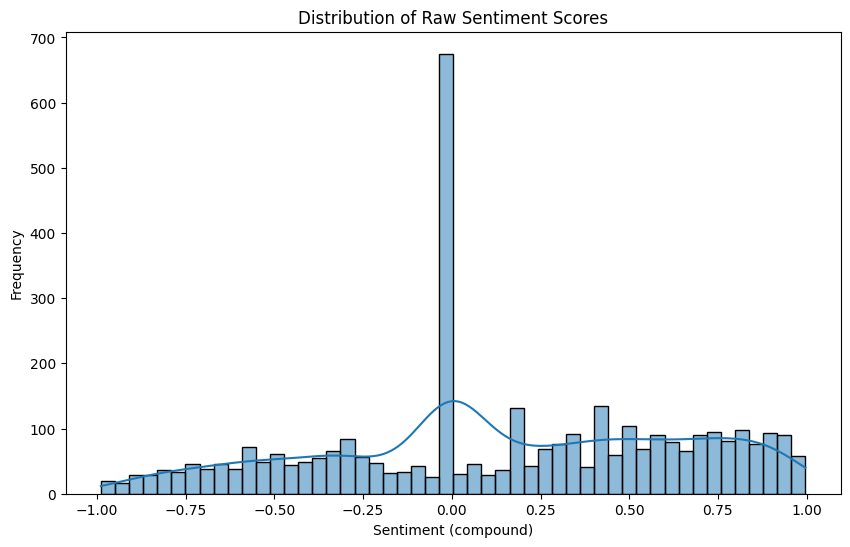

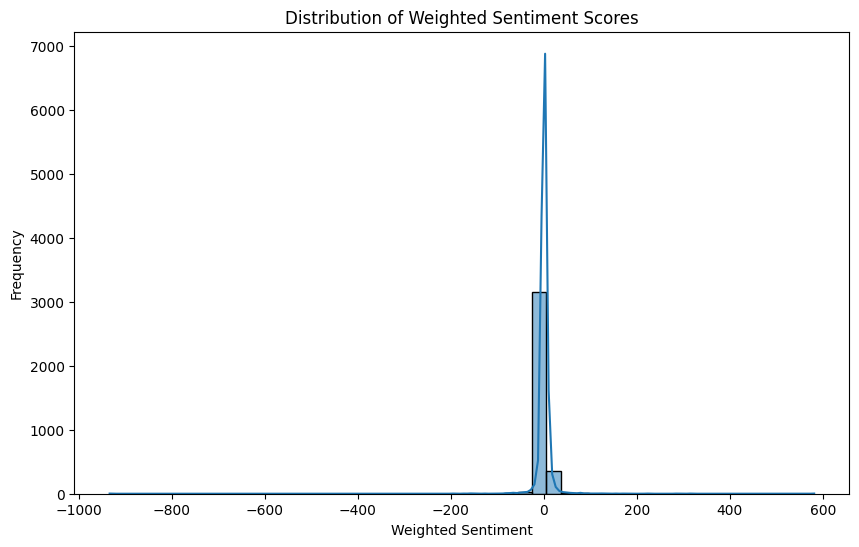

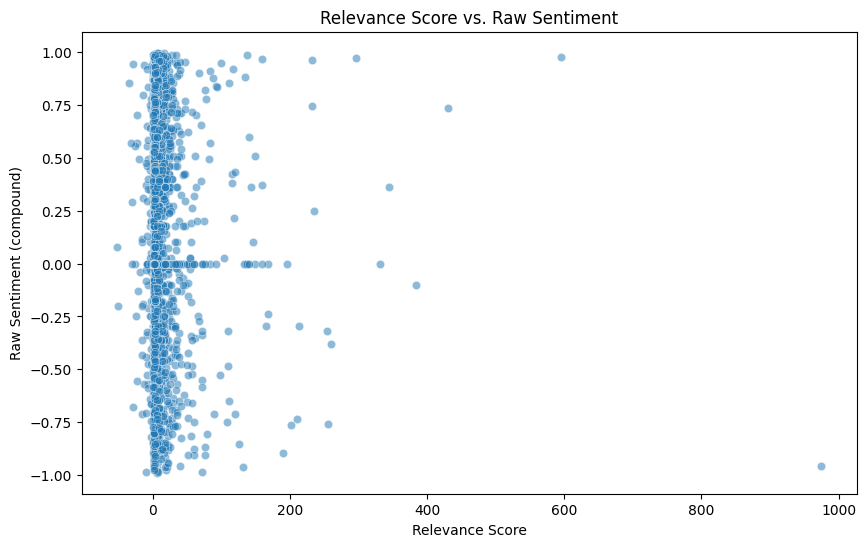

Overall Weighted Average Sentiment: 0.09364120434977224


In [4]:

# Ensure there are no missing values in comment_text
df['comment_text'] = df['comment_text'].fillna("")

# If you haven't already, compute the number of "noon" mentions and relevance score
def count_keyword(text, keyword='noon'):
    if pd.isna(text):
        return 0
    return len(re.findall(r'\b' + re.escape(keyword) + r'\b', text.lower()))

df['noon_count'] = df['comment_text'].apply(lambda x: count_keyword(x, 'noon'))
df['relevance_score'] = df['score'] * (1 + df['noon_count'])

# Sentiment Analysis using VADER
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def compute_sentiment(text):
    # Returns the compound sentiment score
    return sia.polarity_scores(text)['compound']

df['sentiment'] = df['comment_text'].apply(compute_sentiment)

# Compute weighted sentiment: multiplying raw sentiment by the relevance score.
df['weighted_sentiment'] = df['sentiment'] * df['relevance_score']

# Display summary statistics for raw sentiment and weighted sentiment
print("Raw Sentiment Statistics:")
print(df['sentiment'].describe())

print("\nWeighted Sentiment Statistics:")
print(df['weighted_sentiment'].describe())

# Visualization: Distribution of Raw Sentiment Scores
plt.figure(figsize=(10,6))
sns.histplot(df['sentiment'], bins=50, kde=True)
plt.title('Distribution of Raw Sentiment Scores')
plt.xlabel('Sentiment (compound)')
plt.ylabel('Frequency')
plt.show()

# Visualization: Distribution of Weighted Sentiment Scores
plt.figure(figsize=(10,6))
sns.histplot(df['weighted_sentiment'], bins=50, kde=True)
plt.title('Distribution of Weighted Sentiment Scores')
plt.xlabel('Weighted Sentiment')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: Relevance Score vs. Raw Sentiment
plt.figure(figsize=(10,6))
sns.scatterplot(x='relevance_score', y='sentiment', data=df, alpha=0.5)
plt.title('Relevance Score vs. Raw Sentiment')
plt.xlabel('Relevance Score')
plt.ylabel('Raw Sentiment (compound)')
plt.show()

# Optionally, compute an overall weighted average sentiment.
# Here, we use the absolute value of relevance_score as weights to handle negatives.
weighted_avg_sentiment = np.average(df['sentiment'], weights=df['relevance_score'].abs())
print("Overall Weighted Average Sentiment:", weighted_avg_sentiment)

# Noon Company Comments Analysis
 
 This notebook analyzes Reddit comments to determine their relevance to the Noon company.
 We use a list of keywords to decide if a comment is about Noon, calculate a relevance score,
 perform sentiment analysis, visualize the data, and optionally run topic modeling.


In [5]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Section 1: Load Data and Display Basic Information
file_name = "../Data/processed/Final_Noon_Datasets.csv"  # Update as needed
df = pd.read_csv(file_name)

print("DataFrame Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   post_id                3598 non-null   object
 1   post_title             3598 non-null   object
 2   comment_id             3598 non-null   object
 3   author                 3360 non-null   object
 4   comment_text           3598 non-null   object
 5   score                  3598 non-null   int64 
 6   created_utc            3598 non-null   object
 7   is_submitter           3598 non-null   bool  
 8   contains_noon_mention  3598 non-null   bool  
 9   type                   3598 non-null   object
 10  subreddit              3079 non-null   object
dtypes: bool(2), int64(1), object(8)
memory usage: 260.1+ KB
None

First few rows:
   post_id                                     post_title comment_id  \
0  1ibzgq5  Dubai to Riyadh - Which Road to Take? 1 or 2?  

In [6]:
# %% [markdown]
# ## Section 2: Define Keywords & Count Their Occurrences
# 
# We define a list of keywords related to Noon. Then we create a function that counts all occurrences 
# of these keywords in a given text using regular expressions with whole-word matching.

# %% [code]
# List of keywords to identify relevance to Noon
keywords = [
    'noon', 'noon.com', 'noon delivery', 'noon shopping', 
    'noon review', 'noon experience', 'noon seller', 
    'noon daily', 'noon grocery', 'noon express', 
    'noon sale', 'noon discount'
]

print("\nKeywords used for relevance:")
print(keywords)

def count_keywords(text, keywords):
    if pd.isna(text):
        return 0
    text_lower = text.lower()
    total_count = 0
    for kw in keywords:
        # Use word boundaries to match whole keywords
        pattern = r'\b' + re.escape(kw) + r'\b'
        total_count += len(re.findall(pattern, text_lower))
    return total_count

# Compute the frequency of all keywords in each comment
df['keyword_count'] = df['comment_text'].apply(lambda x: count_keywords(x, keywords))




Keywords used for relevance:
['noon', 'noon.com', 'noon delivery', 'noon shopping', 'noon review', 'noon experience', 'noon seller', 'noon daily', 'noon grocery', 'noon express', 'noon sale', 'noon discount']


In [7]:
# %% [markdown]
# ## Section 3: Compute the Relevance Score
# 
# The relevance score is calculated as:
# 
# `relevance_score = score * (1 + keyword_count)`
# 
# This boosts the comment's base score (engagement) by how many times it mentions the Noon-related keywords.

# %% [code]
df['relevance_score'] = df['score'] * (1 + df['keyword_count'])

print("\nRelevance Score Statistics:")
print(df['relevance_score'].describe())

# Display the top 5 most relevant comments
df_sorted = df.sort_values(by='relevance_score', ascending=False)
print("\nTop 5 Most Relevant Comments:")
print(df_sorted[['comment_text', 'score', 'keyword_count', 'relevance_score']].head())




Relevance Score Statistics:
count    3598.000000
mean       10.421067
std        33.883072
min       -78.000000
25%         2.000000
50%         4.000000
75%         8.000000
max      1235.000000
Name: relevance_score, dtype: float64

Top 5 Most Relevant Comments:
                                           comment_text  score  keyword_count  \
3081  Hey, folks! Writing on behalf of BEOLA team. F...     65             18   
321   Guys, it looks like it will have a happy endin...    298              1   
2217  Why are people still buying these items from 3...     86              4   
998   All the riders have been planning up strikes. ...    192              1   
2278  If you bought it with a credit card, you can d...    172              1   

      relevance_score  
3081             1235  
321               596  
2217              430  
998               384  
2278              344  


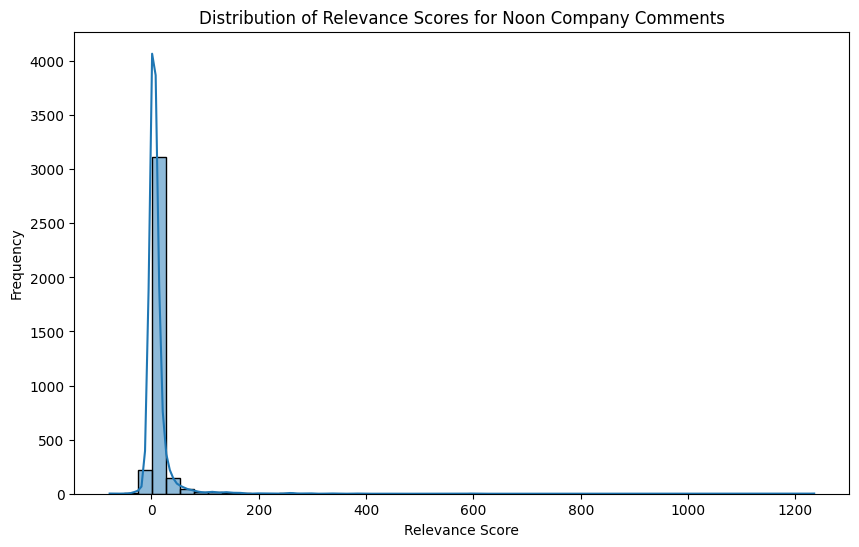

/var/folders/gx/9cn8k5x52gq_wpn2s2w4j2340000gn/T/ipykernel_31314/2312656786.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subreddit_counts.values, y=subreddit_counts.index, palette="viridis")


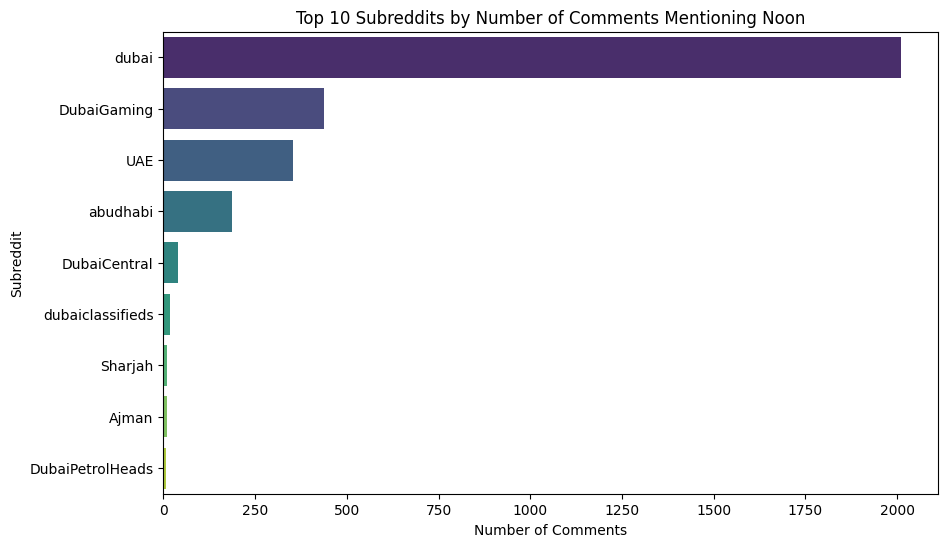

In [8]:
# %% [markdown]
# ## Section 4: Visualizations – Relevance & Subreddit Distribution
# 
# We visualize the distribution of the relevance scores and display the top 10 subreddits where these comments come from.

# %% [code]
# Histogram of Relevance Scores
plt.figure(figsize=(10,6))
sns.histplot(df['relevance_score'], bins=50, kde=True)
plt.title('Distribution of Relevance Scores for Noon Company Comments')
plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.show()

# Bar plot for Top 10 Subreddits by comment count
plt.figure(figsize=(10,6))
subreddit_counts = df['subreddit'].value_counts().head(10)
sns.barplot(x=subreddit_counts.values, y=subreddit_counts.index, palette="viridis")
plt.title('Top 10 Subreddits by Number of Comments Mentioning Noon')
plt.xlabel('Number of Comments')
plt.ylabel('Subreddit')
plt.show()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hariharakumarrathinar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Sentiment Statistics:
count    3598.000000
mean        0.145330
std         0.501787
min        -0.989000
25%        -0.202300
50%         0.090000
75%         0.571300
max         0.996600
Name: sentiment, dtype: float64


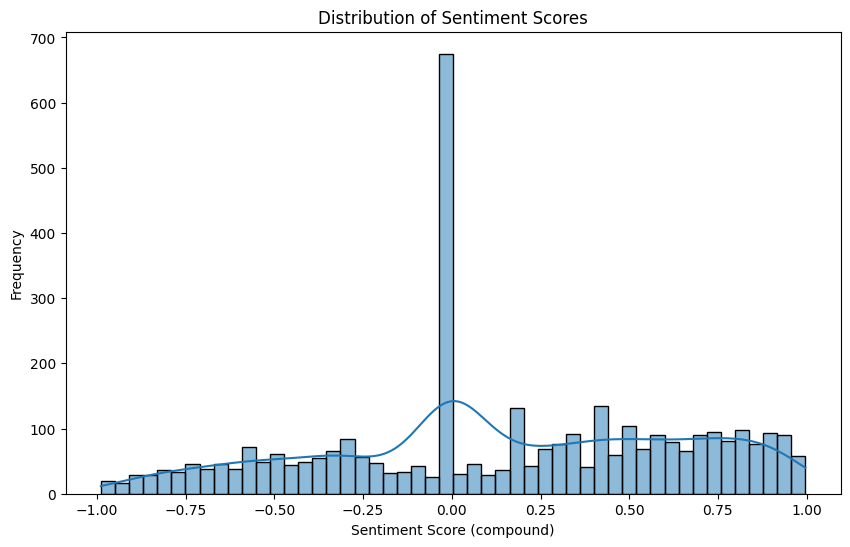

In [9]:
# %% [markdown]
# ## Section 5: Sentiment Analysis with VADER
# 
# We use NLTK’s VADER to compute the compound sentiment score for each comment.

# %% [code]
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def compute_sentiment(text):
    if pd.isna(text) or text.strip() == "":
        return 0
    return sia.polarity_scores(text)['compound']

df['sentiment'] = df['comment_text'].apply(compute_sentiment)

print("\nSentiment Statistics:")
print(df['sentiment'].describe())

# Histogram of Raw Sentiment Scores
plt.figure(figsize=(10,6))
sns.histplot(df['sentiment'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score (compound)')
plt.ylabel('Frequency')
plt.show()




Weighted Sentiment Statistics:
count    3598.000000
mean        0.886649
std        26.934766
min     -1182.636000
25%        -0.592000
50%         0.053700
75%         2.155200
max       581.278800
Name: weighted_sentiment, dtype: float64


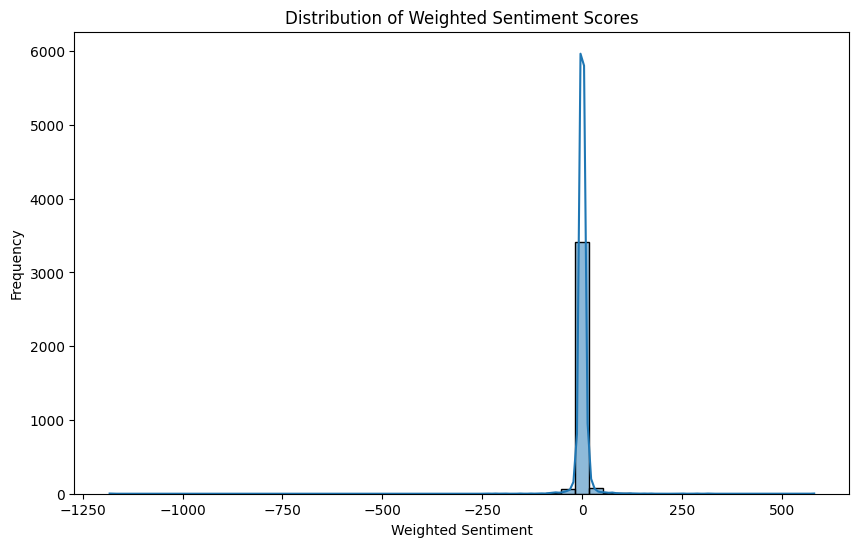

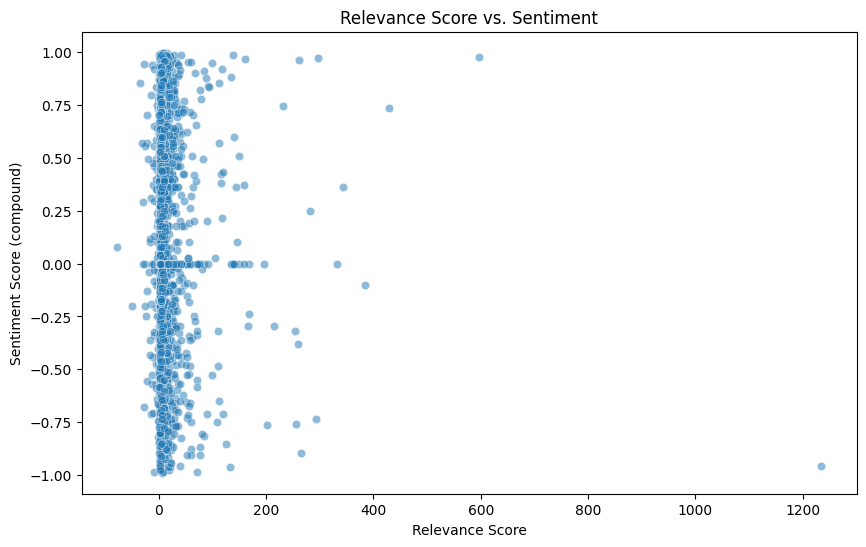

Overall Weighted Average Sentiment: 0.08530039454715599


In [10]:
# %% [markdown]
# ## Section 6: Weighted Sentiment Analysis
# 
# We compute a weighted sentiment by multiplying the raw sentiment by the relevance score.
# This gives higher weight to comments that are both relevant and have strong sentiment.

# %% [code]
df['weighted_sentiment'] = df['sentiment'] * df['relevance_score']

print("\nWeighted Sentiment Statistics:")
print(df['weighted_sentiment'].describe())

# Histogram of Weighted Sentiment Scores
plt.figure(figsize=(10,6))
sns.histplot(df['weighted_sentiment'], bins=50, kde=True)
plt.title('Distribution of Weighted Sentiment Scores')
plt.xlabel('Weighted Sentiment')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: Relevance Score vs. Raw Sentiment
plt.figure(figsize=(10,6))
sns.scatterplot(x='relevance_score', y='sentiment', data=df, alpha=0.5)
plt.title('Relevance Score vs. Sentiment')
plt.xlabel('Relevance Score')
plt.ylabel('Sentiment Score (compound)')
plt.show()

# Compute an overall weighted average sentiment using absolute relevance as weights
weighted_avg_sentiment = np.average(df['sentiment'], weights=df['relevance_score'].abs())
print("Overall Weighted Average Sentiment:", weighted_avg_sentiment)



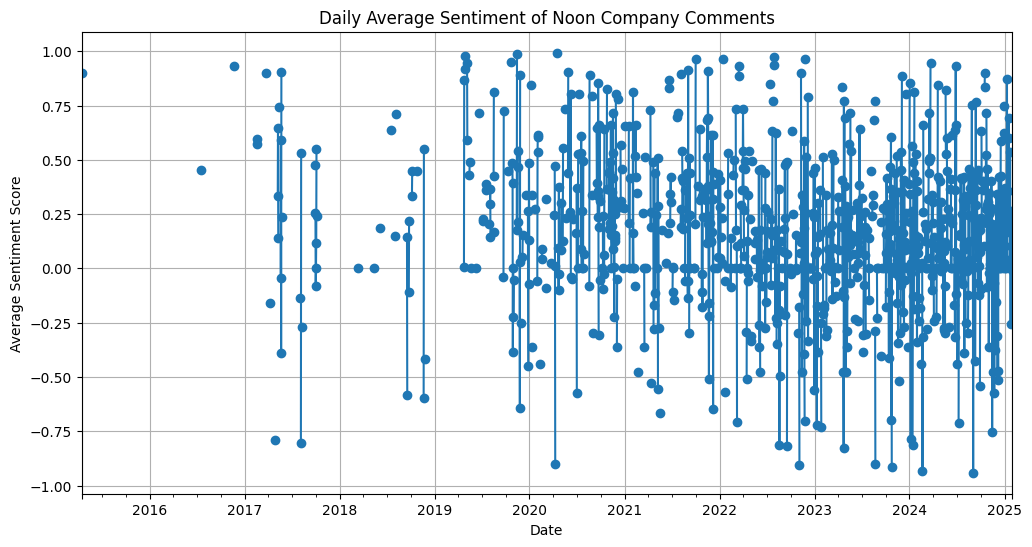

In [11]:
# %% [markdown]
# ## Section 7: Time Series Analysis of Sentiment
# 
# If a timestamp column ("created_utc") is available, we convert it to datetime, resample by day, and plot daily average sentiment.

# %% [code]
if 'created_utc' in df.columns:
    df['created_utc'] = pd.to_datetime(df['created_utc'])
    df.set_index('created_utc', inplace=True)
    
    daily_sentiment = df.resample('D')['sentiment'].mean()
    
    plt.figure(figsize=(12,6))
    daily_sentiment.plot(kind='line', marker='o')
    plt.title('Daily Average Sentiment of Noon Company Comments')
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment Score')
    plt.grid(True)
    plt.show()
    
    df.reset_index(inplace=True)



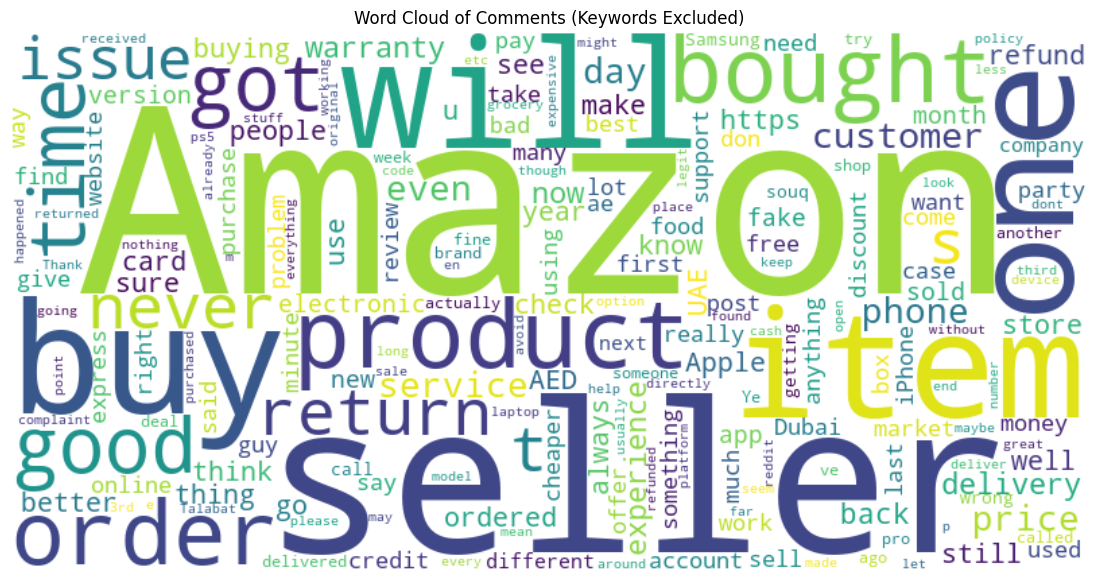

In [12]:
# %% [markdown]
# ## Section 8: Word Cloud Generation
# 
# We generate a word cloud from all comments. The defined keywords are added to the stopwords so they don't dominate the visualization.

# %% [code]
!pip install wordcloud -q

from wordcloud import WordCloud, STOPWORDS

# Combine all comment texts
text_combined = ' '.join(df['comment_text'].dropna().tolist())

# Define stopwords and update with keywords (so they are excluded from the word cloud)
stopwords = set(STOPWORDS)
stopwords.update(keywords)

wordcloud = WordCloud(
    width=800, height=400, background_color='white',
    stopwords=stopwords, collocations=False
).generate(text_combined)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments (Keywords Excluded)')
plt.show()



In [13]:
# %% [markdown]
# ## Section 9: Optional Topic Modeling with LDA
# 
# We perform topic modeling using Scikit-Learn’s LDA on comments longer than 5 words. This step is exploratory and can be refined further.

# %% [code]
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Filter out very short comments for topic modeling
df_topic = df[df['comment_text'].str.split().apply(len) > 5].copy()

# Vectorize text (excluding common English stop words)
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df_topic['comment_text'].dropna())

# Define number of topics for LDA
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(dtm)

def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, feature_names, no_top_words)

print("\nIdentified Topics:")
for topic, words in topics.items():
    print(f"Topic {topic+1}: {', '.join(words)}")


Identified Topics:
Topic 1: card, like, aed, account, credit, cashback, use, app, pay, think
Topic 2: com, amazon, warranty, https, seller, version, bought, uae, got, www
Topic 3: amazon, order, time, delivery, like, just, food, app, minutes, good
Topic 4: amazon, buy, just, don, seller, buying, people, sellers, better, customer
Topic 5: bought, item, got, return, refund, seller, phone, just, amazon, ordered


In [16]:
print("Top 10 High Relevance Comments:")
print(df.sort_values(by='relevance_score', ascending=False)[['comment_text', 'relevance_score', 'keyword_count', 'semantic_similarity']].head(10))

# Show bottom 10 (lowest relevance scores)
print("\nBottom 10 Low Relevance Comments:")
print(df.sort_values(by='relevance_score', ascending=True)[['comment_text', 'relevance_score', 'keyword_count', 'semantic_similarity']].head(10))


Top 10 High Relevance Comments:
                                           comment_text  relevance_score  \
3081  Hey, folks! Writing on behalf of BEOLA team. F...             1235   
321   Guys, it looks like it will have a happy endin...              596   
2217  Why are people still buying these items from 3...              430   
998   All the riders have been planning up strikes. ...              384   
2278  If you bought it with a credit card, you can d...              344   
1656  Repeat after me: "I'll never order from noon a...              332   
1618  solving paywallI issue Noon, the Middle East’s...              296   
1883  So i ordere pixel 7 pro from noon yesterday an...              294   
2187  So the item is a noon express item. So this is...              282   
3473  "My goal is to protect the national economy fr...              266   

      keyword_count  semantic_similarity  
3081             18             0.495216  
321               1             0.098572  
22